# استيراد البيانات

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# السؤال الأول

حجم البيانات

In [3]:
#------------------------Q1---
df.shape

(148654, 13)

نوع البيانات

In [4]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

الخلايا الفارغة بالبيانات

In [5]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

# السؤال الثاني

إحصائيات الرواتب تم حساب القيم الإحصائية للرواتب

In [6]:
#------------------------Q2---
df_pay=df.iloc[:,8:9]
data_analysis=df_pay.describe()
df_pay.describe()

,TotalPayBenefits
count,148654.000000
mean,93692.554811
std,62793.533483
min,-618.130000
25%,44065.650000
50%,92404.090000
75%,132876.450000
max,567595.430000


 مجال الرواتب تم الحساب من خلال طرح أصغر قيمة من القيمة الكبرى

In [7]:
data_analysis.max()-data_analysis.min()

TotalPayBenefits    568213.56
dtype: float64

الانحراف المعياري للرواتب

In [8]:
df_pay.std()

TotalPayBenefits    62793.533483
dtype: float64

# السؤال الثالث

تنظيف البيانات وتم ذلك من خلال تحويل القيم الغير موجود في النصوص لشاخطة وفي الأعداد للقيمة الصفرية ولم يتم حذف أي قيمة من البيانات حتى تكون الإحصائيات كاملة

In [9]:
#------------------------Q3---
df_num=df.iloc[:,3:9]
df_num.clip(0,inplace=True)
df_na=df
df_str=df.iloc[:,10:13]
df.iloc[:,10:13]=df_str.fillna('-')
df.iloc[:,3:9]=df_num.fillna(0)
df.tail(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148644,148645,Randy D Winn,"Stationary Eng, Sewage Plant",0.0,0.0,0.0,0.0,0.0,0.0,2014,-,San Francisco,-
148645,148646,Carolyn A Wilson,Human Services Technician,0.0,0.0,0.0,0.0,0.0,0.0,2014,-,San Francisco,-
148646,148647,Not provided,Not provided,0.0,0.0,0.0,0.0,0.0,0.0,2014,-,San Francisco,-
148647,148648,Joann Anderson,Communications Dispatcher 2,0.0,0.0,0.0,0.0,0.0,0.0,2014,-,San Francisco,-
148648,148649,Leon Walker,Custodian,0.0,0.0,0.0,0.0,0.0,0.0,2014,-,San Francisco,-
148649,148650,Roy I Tillery,Custodian,0.0,0.0,0.0,0.0,0.0,0.0,2014,-,San Francisco,-
148650,148651,Not provided,Not provided,0.0,0.0,0.0,0.0,0.0,0.0,2014,-,San Francisco,-
148651,148652,Not provided,Not provided,0.0,0.0,0.0,0.0,0.0,0.0,2014,-,San Francisco,-
148652,148653,Not provided,Not provided,0.0,0.0,0.0,0.0,0.0,0.0,2014,-,San Francisco,-
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,0.0,0.0,0.0,0.0,2014,-,San Francisco,-


# السؤال الرابع

مخطط يوضح الرواتب وفقًا لرقم المعرف الخاص بالموظف

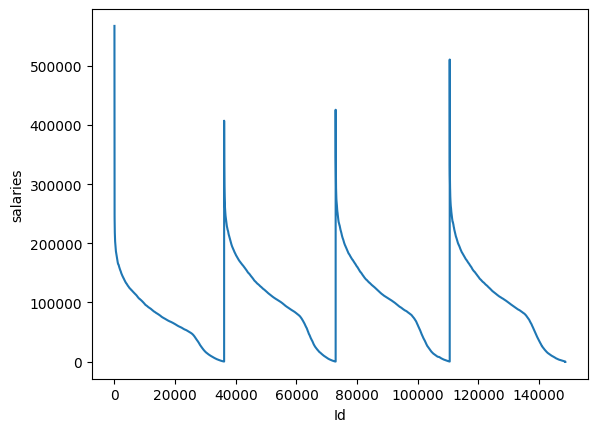

In [10]:
#------------------------Q4---
x=df['Id']
plt.plot(x,df_pay)
plt.xlabel('Id')
plt.ylabel('salaries')
plt.show()

عدد الموظفين في كل وظيفة تم تمييز أقل 10 % من الموظفين تحت فئة "أخرى" ومع ذلك فإن عدد المسميات الوظيفية كبير  

In [11]:
count_Employee=df['JobTitle'].value_counts()
count_job=count_Employee.sum()
to_remove=count_Employee[count_Employee.cumsum()>count_job*0.9001].index
count_Employee_clean=count_Employee[~count_Employee.index.isin(to_remove)]
other_job=count_Employee[count_Employee.index.isin(to_remove)].sum()
count_Employee_clean.loc[len(count_Employee_clean)]=other_job
new_index=list(count_Employee_clean.index)
new_index[-1]='others'
count_Employee_clean.index=new_index
count_Employee_clean.head()

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: count, dtype: int64

مخطط فطيري للتوزيع الوظيفي

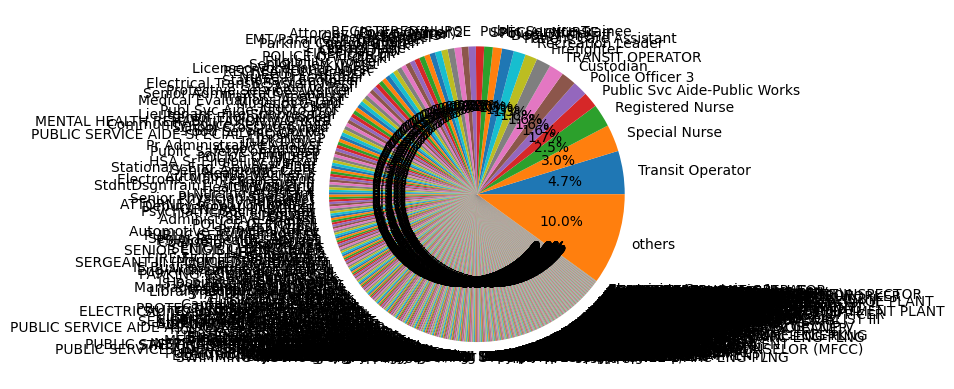

In [12]:
plt.cla()
plt.pie(count_Employee_clean,labels=count_Employee_clean.index,autopct='%1.1f%%')
plt.show()

# السؤال الخامس

تم تجميع الرواتب وتحليلها وفقًا لكل مسمى وظيفي على حدى

In [13]:
#------------------------Q5---
gruopdf=df.groupby('JobTitle')
gruopdf['TotalPayBenefits'].describe()

,count,mean,std,min,25%,50%,75%,max
JobTitle,,,,,,,,
ACCOUNT CLERK,83.0,44035.664337,13170.742908,614.00,42984.0100,49777.820,50401.8100,60838.20
ACCOUNTANT,5.0,47429.268000,27137.331315,1148.40,45304.3800,60076.240,65225.3100,65392.01
ACCOUNTANT INTERN,48.0,29031.742917,20711.322649,2981.53,9940.0000,17658.505,53789.8000,58799.53
"ACPO,JuvP, Juv Prob (SFERS)",1.0,80266.370000,NaN,80266.37,80266.3700,80266.370,80266.3700,80266.37
ACUPUNCTURIST,1.0,67594.400000,NaN,67594.40,67594.4000,67594.400,67594.4000,67594.40
...,...,...,...,...,...,...,...,...
X-RAY LABORATORY AIDE,26.0,52705.880385,19760.943417,5343.69,51729.9150,60333.125,64305.2850,85077.40
X-Ray Laboratory Aide,100.0,69521.123200,35747.544961,1017.07,28543.0150,85551.190,96592.2975,129044.16
"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",1.0,53632.870000,NaN,53632.87,53632.8700,53632.870,53632.8700,53632.87


In [14]:
gruopdf['TotalPayBenefits'].median()

JobTitle
ACCOUNT CLERK                                     49777.820
ACCOUNTANT                                        60076.240
ACCOUNTANT INTERN                                 17658.505
ACPO,JuvP, Juv Prob (SFERS)                       80266.370
ACUPUNCTURIST                                     67594.400
                                                    ...    
X-RAY LABORATORY AIDE                             60333.125
X-Ray Laboratory Aide                             85551.190
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    53632.870
Youth Comm Advisor                                64871.285
ZOO CURATOR                                       66686.560
Name: TotalPayBenefits, Length: 2159, dtype: float64

# السؤال السادس

تم دراسة معامل الارتباط بين الراتب مع الراتب الثابت والمكافأت والإضافي ووو

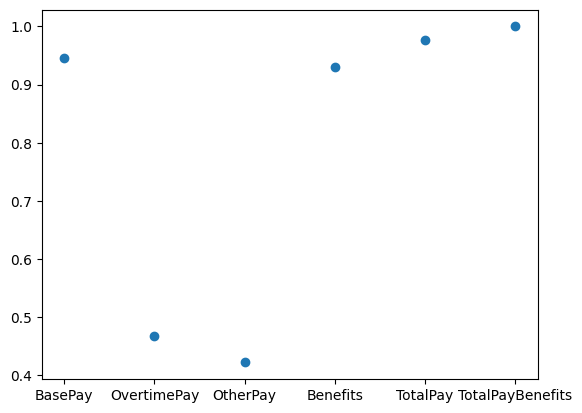

In [15]:
#------------------------Q6---
plt.cla()
plt.scatter(['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits'],df_num.corrwith(df_num['TotalPayBenefits']))
plt.show()

# السؤال السابع

كانت البيانات ضخمة وفيها بيانات فارغة ومفقودة تم تصحيح هذه الأخطاء وهذه الأخطاء أثرت بشكل واضح على الإحصاءات المطلوبة تم إنشاء المخططات التي بينت بشكل واضح كيفية توزيع الرواتب للموظفين ثم تجميع الموظفين ضمن مجموعات وظيفية وتم تبيين الإحصائيات وفقًا لهذه المجموعات وظهر ترابط واضح بين الراتب النهائي والراتب المستحق قبل الزوائد

In [16]:
#------------------------Q7---
print('end')


end
